In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataproc_utils import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('max_colwidth', 400)

In [2]:
# data exploration of the stances file in train set
stances = pd.read_csv('fnc-data/train_stances.csv')

In [3]:
stances.tail(10)

,Headline,Body ID,Stance
49962,Would-be rapist has penis severed by angry mob,36,unrelated
49963,"Nigeria claims deal with Boko Haram on ceasefire, kidnapped girls",2078,unrelated
49964,'Banksy' Reacts To Paris Attack With Poignant Drawing,438,unrelated
49965,Indian 'Rapist' Castrated By Angry Mob Who Hack Off Gentials With Meat Cleaver (GRAPHIC PICTURES),1760,unrelated
49966,Canadian Soldier Shot At Ottawa War Memorial: Report,524,unrelated
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghdadi' Killed! / Photo,1681,unrelated
49968,Brian Williams slams social media for speculation weatherman Mike Seidel relieved himself on air,2419,unrelated
49969,Mexico Says Missing Students Not Found In First Mass Graves,1156,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Apprehended Coming Across Southern Border (Video),1012,discuss
49971,Shots Heard In Alleged Brown Shooting Recording [AUDIO],2044,unrelated


In [4]:
# total number of headlines (claims)
stances.Headline.count()

49972

In [5]:
# number of unique headlines (claims)
stances.Headline.nunique()

1648

In [6]:
stances['n_words'] = 0

for col, row in stances.iterrows():
    claim = row['Headline']
    n_words = len(claim.split(' '))
    stances.loc[col, 'n_words'] = n_words

In [7]:
stances.head(10)

,Headline,Body ID,Stance,n_words
0,Police find mass graves with at least '15 bodies' near Mexico town where 43 students disappeared after police clash,712,unrelated,19
1,Hundreds of Palestinians flee floods in Gaza as Israel opens dams,158,agree,11
2,"Christian Bale passes on role of Steve Jobs, actor reportedly felt he wasn't right for part",137,unrelated,16
3,HBO and Apple in Talks for $15/Month Apple TV Streaming Service Launching in April,1034,unrelated,14
4,Spider burrowed through tourist's stomach and up into his chest,1923,disagree,10
5,'Nasa Confirms Earth Will Experience 6 Days of Total Darkness in December' Fake News Story Goes Viral,154,agree,17
6,"Accused Boston Marathon Bomber Severely Injured In Prison, May Never Walk Or Talk Again",962,unrelated,14
7,Identity of ISIS terrorist known as 'Jihadi John' reportedly revealed,2033,unrelated,10
8,Banksy 'Arrested & Real Identity Revealed' Is The Same Hoax From Last Year,1739,agree,13
9,British Aid Worker Confirmed Murdered By ISIS,882,unrelated,7


In [12]:
# median word count per headline
stances.n_words.median()

10.0

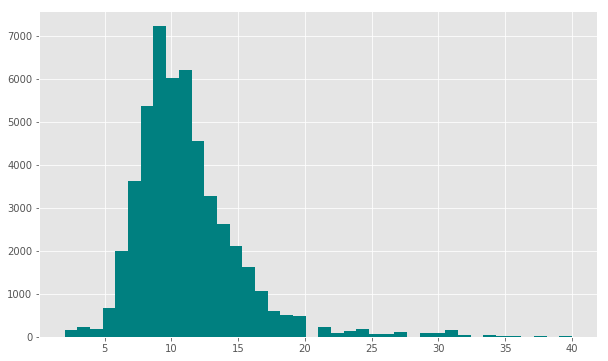

In [17]:
# word count per headline
stances.n_words.hist(bins=40, color='teal')
plt.style.use('ggplot')

In [18]:
# number of unique Body ID's (documents used as evidence for stance)
stances['Body ID'].nunique()

1683

In [19]:
# class distribution
stances.Stance.value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

In [20]:
# normalized class distribution
stance_dist = stances.Stance.value_counts(normalize=True)

stance_dist

unrelated    0.731310
discuss      0.178280
agree        0.073601
disagree     0.016809
Name: Stance, dtype: float64

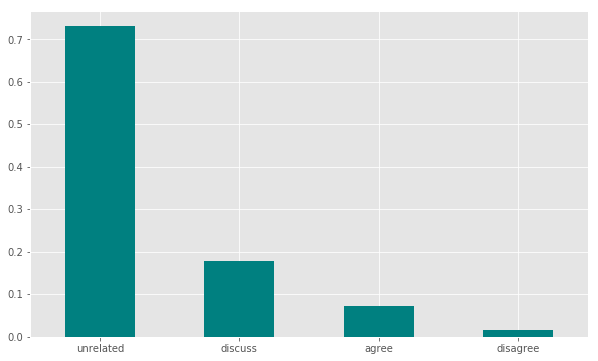

In [21]:
stance_dist.plot(kind='bar', color='teal')
plt.style.use('ggplot')
plt.xticks(rotation=0)
plt.show()

In [22]:
# data exploration of the bodies file in train set
bodies = pd.read_csv('fnc-data/train_bodies.csv')

In [23]:
bodies.head()

,Body ID,articleBody
0,0,"A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a ""relatively small"" met..."
1,4,"Last week we hinted at what was to come as Ebola fears spread across America. Today, we get confirmation. As The Daily Caller reports, one passenger at Dulles International Airport outside Washington, D.C. is apparently not taking any chances. A female passenger dressed in a hazmat suit - complete with a full body gown, mask and gloves - was spotted Wednesday waiting for a flight at the airpor..."
2,5,"(NEWSER) – Wonder how long a Quarter Pounder with cheese can last? Two Australians say they bought a few McDonald's burgers for friends back in 1995, when they were teens, and one of the friends never showed up. So the kid's burger went uneaten—and stayed that way, Australia's News Network reports. ""We’re pretty sure it’s the oldest burger in the world,"" says one of the men, Casey Dean. Holdin..."
3,6,"Posting photos of a gun-toting child online, ISIS supporters announced that the group’s youngest soldier has died in combat.\n\nTwitter accounts linked to the Islamic State of Iraq and Al-Sham claimed that the child soldier “got martyred” with his father while fighting for the terrorist group in Syria.\n\nPhotos posted on Twitter showed the smiling boy in military fatigues holding weapons that..."
4,7,"At least 25 suspected Boko Haram insurgents were killed in clashes between soldiers and the Islamist militants in northeast Nigeria and five civilians were killed in fighting elsewhere in the region, a military source and residents said on Monday.\n\nA ceasefire agreement between Boko Haram and the Nigerian government was expected to lead to the liberation of more than 200 schoolgirls kidnappe..."


In [24]:
# total number of articles (documents)
# corresponds to the number of unique bodies in the stances file
bodies.articleBody.count()

1683

In [25]:
bodies['n_paraphs'] = 0

for col, row in bodies.iterrows():
    body = row['articleBody']
    n_paras = len(body.split('\n\n'))
    bodies.loc[col, 'n_paraphs'] = n_paras

In [26]:
bodies.head(10)

,Body ID,articleBody,n_paraphs
0,0,"A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a ""relatively small"" met...",9
1,4,"Last week we hinted at what was to come as Ebola fears spread across America. Today, we get confirmation. As The Daily Caller reports, one passenger at Dulles International Airport outside Washington, D.C. is apparently not taking any chances. A female passenger dressed in a hazmat suit - complete with a full body gown, mask and gloves - was spotted Wednesday waiting for a flight at the airpor...",7
2,5,"(NEWSER) – Wonder how long a Quarter Pounder with cheese can last? Two Australians say they bought a few McDonald's burgers for friends back in 1995, when they were teens, and one of the friends never showed up. So the kid's burger went uneaten—and stayed that way, Australia's News Network reports. ""We’re pretty sure it’s the oldest burger in the world,"" says one of the men, Casey Dean. Holdin...",2
3,6,"Posting photos of a gun-toting child online, ISIS supporters announced that the group’s youngest soldier has died in combat.\n\nTwitter accounts linked to the Islamic State of Iraq and Al-Sham claimed that the child soldier “got martyred” with his father while fighting for the terrorist group in Syria.\n\nPhotos posted on Twitter showed the smiling boy in military fatigues holding weapons that...",13
4,7,"At least 25 suspected Boko Haram insurgents were killed in clashes between soldiers and the Islamist militants in northeast Nigeria and five civilians were killed in fighting elsewhere in the region, a military source and residents said on Monday.\n\nA ceasefire agreement between Boko Haram and the Nigerian government was expected to lead to the liberation of more than 200 schoolgirls kidnappe...",12
5,8,"There is so much fake stuff on the Internet in any given week that we’ve grown tired of debunking it all. Fake Twitter fights. Fake DHL ads. Amazing viral video? Nope — a Jimmy Kimmel stunt!\n\nSo, rather than take down each and every undeservedly viral story that crosses our monitors each week, we’re rounding them all up in a quick, once-a-week Friday debunk of fake photos, misleading headlin...",20
6,9,"(CNN) -- A meteorite crashed down in Managua, Nicaragua, late Saturday night, causing a loud explosion and leaving a crater 39 feet (12 meters) across, government officials said, according to The Associated Press. No damage or injuries were reported.\n\nAP quoted government spokeswoman Rosario Murillo as saying they've determined it was a ""relatively small"" meteorite that ""appears to have come...",14
7,10,"Move over, Netflix and Hulu.\nWord has it that Amazon is looking to launch an ad-supported streaming video service, which could give rivals a run for their money. The online retail giant is planning to roll out the new service early next year, the New York Post reported on Friday. It would be separate from Amazon's $99 yearly Prime membership, which offers unlimited movie streaming from the In...",1
8,11,"We’ve all seen the traditional depictions of God as a cloud-dwelling figure with a flowing mane and a white beard.\n\nBut now, a Catholic priest in America has apparently claimed that God is female, after he officially died for 48 minutes following a massive heart attack.\n\nAccording to an unverified report, Father John Micheal O’Neal, 71, briefly went to heaven and met a ‘warm and comforting...",12
9,13,A SOLDIER has been shot at Canada’s National War Memorial with witnesses saying a gunman than ran to the nation’s parliament.\n\nCanada’s parliament is in lockdown following the gunfire with heavily armed police racing to seal off the building and the office of Canadian Prime M

In [28]:
# median number of paragraphs per article body
bodies.n_paraphs.median()

9.0

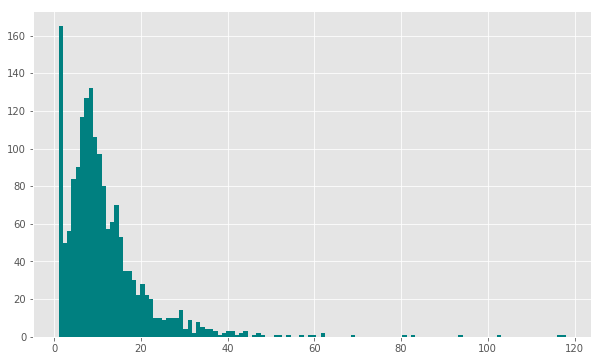

In [29]:
# paragraph count per headline
bodies.n_paraphs.hist(bins=118, color='teal')
plt.style.use('ggplot')

In [30]:
pars = split_paraphs(bodies)

In [31]:
df_pars = pd.DataFrame(pars, columns=['Body ID', 'Paragraph'])
df_pars.tail(10)

,Body ID,Paragraph
18619,2531,Qatar gained public praise from President Barack Obama for brokering the controversial deal in May 2014 that freed Army Sgt. Bergdahl from Taliban captivity in exchange for the release of the five senior Taliban officials who had been imprisoned for years at the US-run Guantanamo Bay prison in Cuba.
18620,2531,"Qatar promised Mr Obama it would keep the five under watch for one year, although they would then be free to leave."
18621,2531,"""It's just a year deal,"" Mr Graham told The Associated Press on Wednesday. ""Just as sure as we're sitting here, they're going back to the fight."""
18622,2531,"""They've had some Haqqani people come to meet with them. ... They're reaching out. The Taliban five are communicating with people inside Afghanistan."""
18623,2531,"However, Mr Graham, a member of the Senate Armed Services Committee and a leading Capitol Hill voice on foreign policy, said all five are still in Qatar."
18624,2531,"""I was afraid one had left, but they told me they're all still there,"" he said."
18625,2531,The Pentagon said in a statement that it would not comment on specific cases involving the detainees.
18626,2531,"""However, we take any incidence of re-engagement very seriously, and we work in close coordination through military, intelligence, law enforcement and diplomatic channels to mitigate re-engagement and to take follow-on action when necessary,"" the statement said. ""The Defense Department has a close security partnership with the government of Qatar. We're confident in our ability to continue to ..."
18627,2531,"Haqqani operates in the Afghanistan-Pakistan border region and has been one of the deadliest threats to US troops in the war. The network, which the State Department designated as a foreign terrorist organisation in 2012, claims allegiance to the Afghan Taliban, yet operates with some degree of autonomy."
18628,2532,"ANN ARBOR, Mich. – A pizza delivery man in Michigan got a huge surprise when he made a special delivery to a hotel last week.\n“Rob”, the delivery driver, thought he was dropping off food for a guest, but he was escorted to a conference room where 200 Keller Williams realtors were holding their annual conference.\nThey surprised him with a tip of more than $2,000 plus a VISA gift card, some lo..."


In [32]:
df_pars['n_words'] = 0

for col, row in df_pars.iterrows():
    par = row['Paragraph']
    n_words = len(par.split())
    df_pars.loc[col, 'n_words'] = n_words

In [33]:
df_pars.tail(10)

,Body ID,Paragraph,n_words
18619,2531,Qatar gained public praise from President Barack Obama for brokering the controversial deal in May 2014 that freed Army Sgt. Bergdahl from Taliban captivity in exchange for the release of the five senior Taliban officials who had been imprisoned for years at the US-run Guantanamo Bay prison in Cuba.,49
18620,2531,"Qatar promised Mr Obama it would keep the five under watch for one year, although they would then be free to leave.",22
18621,2531,"""It's just a year deal,"" Mr Graham told The Associated Press on Wednesday. ""Just as sure as we're sitting here, they're going back to the fight.""",26
18622,2531,"""They've had some Haqqani people come to meet with them. ... They're reaching out. The Taliban five are communicating with people inside Afghanistan.""",23
18623,2531,"However, Mr Graham, a member of the Senate Armed Services Committee and a leading Capitol Hill voice on foreign policy, said all five are still in Qatar.",27
18624,2531,"""I was afraid one had left, but they told me they're all still there,"" he said.",16
18625,2531,The Pentagon said in a statement that it would not comment on specific cases involving the detainees.,17
18626,2531,"""However, we take any incidence of re-engagement very seriously, and we work in close coordination through military, intelligence, law enforcement and diplomatic channels to mitigate re-engagement and to take follow-on action when necessary,"" the statement said. ""The Defense Department has a close security partnership with the government of Qatar. We're confident in our ability to continue to ...",69
18627,2531,"Haqqani operates in the Afghanistan-Pakistan border region and has been one of the deadliest threats to US troops in the war. The network, which the State Department designated as a foreign terrorist organisation in 2012, claims allegiance to the Afghan Taliban, yet operates with some degree of autonomy.",48
18628,2532,"ANN ARBOR, Mich. – A pizza delivery man in Michigan got a huge surprise when he made a special delivery to a hotel last week.\n“Rob”, the delivery driver, thought he was dropping off food for a guest, but he was escorted to a conference room where 200 Keller Williams realtors were holding their annual conference.\nThey surprised him with a tip of more than $2,000 plus a VISA gift card, some lo...",96


In [34]:
# median number of words per paragraph
df_pars.n_words.median()

27.0

In [35]:
# mean number of words per paragraph
df_pars.n_words.max()

1563

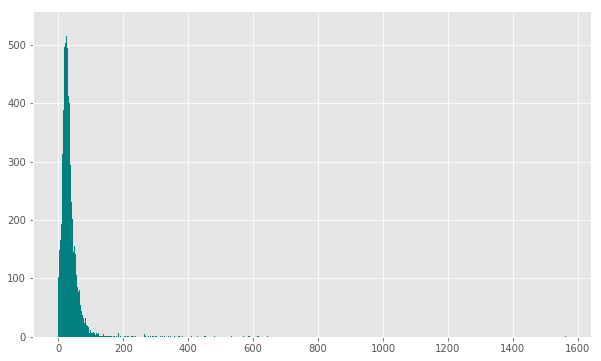

In [36]:
# word count per paragraph
df_pars.n_words.hist(bins=1563, color='teal')
plt.style.use('ggplot')